# Day and Night Image Classifier
---

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*



In [3]:
import cv2 # computer vision library
import helpers

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import glob # library for loading images from a directory

%matplotlib inline

## Train and Test Data

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

## Loading Dataset

In [4]:
def load_dataset(image_dir):
    
    # Populate this empty image list 
    im_list = []
    image_types = ["day", "night"]
    
    # iterate through each color folder 
    
    for im_type in image_types:
        
        # Iterate through each image file in each image_type folder
        # glob reads in any image with the extension "image_dir/im_type/*"
        
        for file in glob.glob(os.path.join(image_dir, im_type, "*")):
            
            # Read in the image 
            im = mpimg.imread(file)
            
            # Check if the image exists/if it's been correctly read-in
            if not im is None:
                # Append the image, and it's type (red, green, yellow) to the image list
                im_list.append((im, im_type))
                
    return im_list

In [5]:
IMAGE_LIST = load_dataset(image_dir_training)

## Construct a STANDARDIZED_LIST of input images and output labels


In [7]:
## Standardize the input images
# Resize each image to the desired input size: 600x1100px (hxw).

## Standardize the output
# With each loaded image, we also specify the expected output.
# For this, we use binary numerical values 0/1 = night/day.


# This function should take in an RGB image and return a new, standardized version
# 600 height x 1100 width image size (px x px)
def standardize_input(image):
    
    # Resize image and pre-process so that all "standard" images are the same size
    standard_im = cv2.resize(image, (1100, 600))
    
    return standard_im


# Examples:
# encode("day") should return: 1
# encode("night") should return: 0
def encode(label):
    
    numerical_val = 0
    if(label == 'day'):
        numerical_val = 1
    # else it is night and can stay 0
    
    return numerical_val

# using both functions above, standardize the input images and output labels
def standardize(image_list):
    
    # Empty image data array
    standard_list = []
    
    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]
        
        # Standardize the image
        standardized_im = standardize_input(image)
        
        # Create a numerical label
        binary_label = encode(label)
        
        # Append the image, and it's one hot encoded label to the full, processed list of image data
        standard_list.append((standardized_im, binary_label))
    
    return standard_list

In [8]:
STANDARDIZED_LIST = standardize(IMAGE_LIST)

## Visualize and Standardized Data

In [16]:
# STANDARDIZED_LIST[0]

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


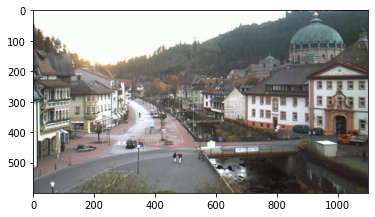

In [22]:
# Display the standardized image and its label 

# Select an Image by index 
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it 
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))

## Feature Extraction


Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.

In [23]:
# Find the average Value or brightness of an image

def avg_brightness(rgb_image):
    
    # Convert Image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    
    # Add up all the pixel values in the V channel 
    sum_brightness = np.sum(hsv[:,:,2])
    area = 600*1100.0
    
    # find the avg 
    avg = sum_brightness/area
    
    return avg

Avg brightness: 119.6223


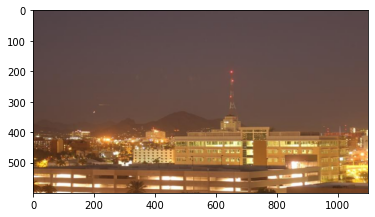

In [24]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

## Classification and Visualizing Error

In [25]:
# This function should take in RGB image input

def estimate_label(rgb_image):
    
    # Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
    
    # Use the avg brightness feature to predict a label (0,1)
    predicted_label = 0
    threshold = 120
    
    if(avg > threshold):
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label 

## Testing 

In [26]:
import random

# Using the load_dataset function in helpers.py
# Load test data
TEST_IMAGE_LIST = load_dataset(image_dir_test)

# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)

# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

## Check the accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.

In [34]:
# Constructs a list of misclassified images given a list of test images and their labels

def get_misclassified_images(test_images):
    
    misclassified_images_labels = []
    
    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:
        
        # Get true data
        im = image[0]
        true_label = image[1]
        
        # Get predicted label from your classifier
        predicted_label = estimate_label(im)
        
        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
        
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels

In [35]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(STANDARDIZED_TEST_LIST)

# Accuracy calculations
total = len(STANDARDIZED_TEST_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.86875
Number of misclassified images = 21 out of 160


## Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

0


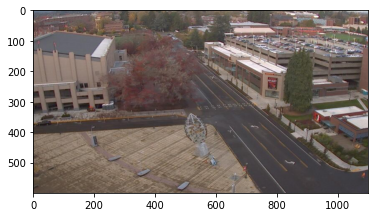

In [36]:
# Visualize misclassified example(s)

num = 0
test_mis_im = MISCLASSIFIED[num][0]
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][1]))